<a href="https://colab.research.google.com/github/Aleena24/ML_Lab/blob/main/lab3_2348503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
dataset = pd.read_csv('/content/Market_Basket_Optimisation.csv')
dataset.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


calculates the descriptive statistics of the columns

In [ ]:
dataset.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [ ]:
datasets=dataset.drop(columns = ['olive oil'])
datasets

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#appending into transactions
transactions = []
for i in range(0,datasets.shape[0]):
    transactions.append([str(datasets.values[i,j])for j in range(0,datasets.shape[1])])
print(transactions)


[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'

In [ ]:
transactions = []

for i in range(0, datasets.shape[0]):
    transaction = [str(datasets.values[i, j]) for j in range(0, datasets.shape[1]) if str(datasets.values[i, j]) != 'nan']
    transactions.append(transaction)

print(transactions)

In [ ]:
datasets.shape
dataset.isnull().sum().sum()

120657

120657 rows and 12 columns
120657 missing values

In [ ]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)
len(unique_items_list)

121

In [ ]:
# Populate the DataFrame with binary values
binary_matrix = pd.DataFrame(columns=unique_items_list)
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)


     ketchup strong cheese yogurt cake oil burger sauce salt  \
0          0             0           0   0            0    0   
1          0             0           0   0            0    0   
2          0             0           0   0            0    0   
3          0             0           0   0            0    0   
4          0             0           0   0            0    0   
...      ...           ...         ...  ..          ...  ...   
7495       0             0           0   0            0    0   
7496       0             0           0   0            0    0   
7497       0             0           0   0            0    0   
7498       0             0           0   0            0    0   
7499       0             0           1   0            0    0   

     frozen vegetables french fries chicken herb & pepper  ... chocolate  \
0                    0            0       0             0  ...         0   
1                    0            0       0             0  ...         0   
2  

In [ ]:
#sum of values from binary matrix
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

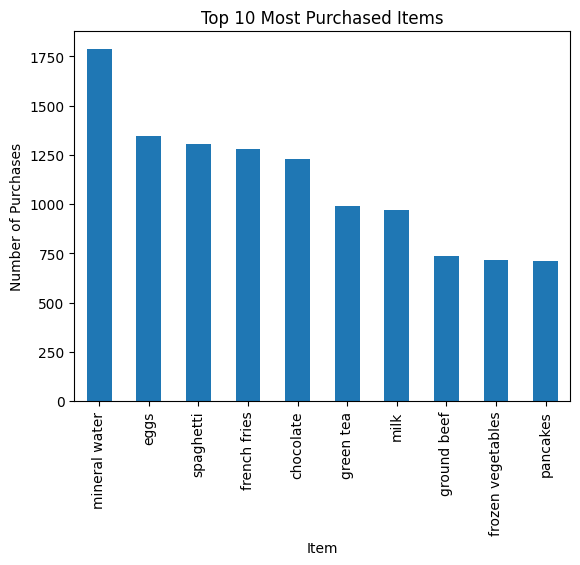

In [ ]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [ ]:
#least purchased items bottom 10
bottom10=binary_matrix.sum().sort_values(ascending=True)[:10]
bottom10

 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
mashed potato      31
chutney            31
chocolate bread    32
ketchup            33
dtype: object

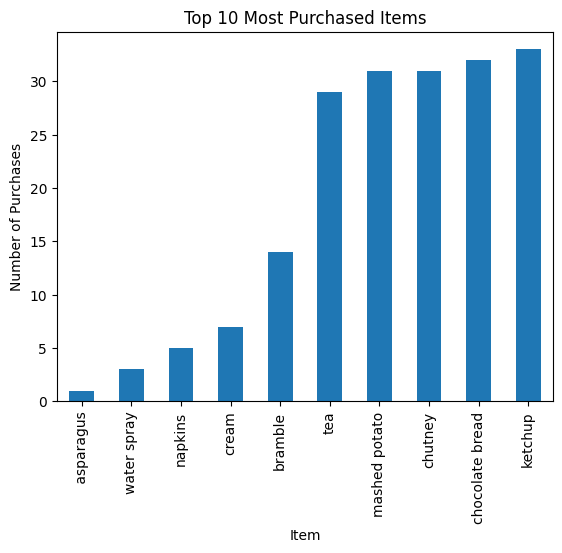

In [ ]:
bottom10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [ ]:
basket=pd.DataFrame(binary_matrix)

In [ ]:
frequent_itemset = apriori(basket,min_support=0.02,use_colnames=True)

#association rules
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

The **min_support** bold text parameter is set to 0.02 = itemset must be found in at least 2% of the transactions to be considered frequent. The **use_colnames** parameter is set to True, which means that the column names of the DataFrame basket will be used to name the itemsets.

In [ ]:
rules[(rules['confidence']>0.2) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
2,(frozen vegetables),(eggs),0.095333,0.179733,0.021733,0.227972,1.268390,0.004599,1.062483,0.233897
5,(frozen vegetables),(spaghetti),0.095333,0.174133,0.027867,0.292308,1.678643,0.011266,1.166986,0.446884
6,(frozen vegetables),(milk),0.095333,0.129600,0.023600,0.247552,1.910127,0.011245,1.156758,0.526685
8,(frozen vegetables),(chocolate),0.095333,0.163867,0.022933,0.240559,1.468019,0.007311,1.100986,0.352406
10,(green tea),(french fries),0.132000,0.170933,0.028533,0.216162,1.264596,0.005970,1.057701,0.241053
12,(french fries),(eggs),0.170933,0.179733,0.036400,0.212949,1.184803,0.005678,1.042202,0.188136
13,(eggs),(french fries),0.179733,0.170933,0.036400,0.202522,1.184803,0.005678,1.039611,0.190155
17,(burgers),(french fries),0.087200,0.170933,0.022000,0.252294,1.475976,0.007095,1.108813,0.353289
18,(pancakes),(french fries),0.095067,0.170933,0.020133,0.211781,1.238970,0.003883,1.051823,0.213140


filters the DataFrame to only include rules with a confidence of at least 0.2 and a lift of at least 1.

In [ ]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
       antecedents      consequents      lift
15          (milk)   (french fries)  1.071339
14  (french fries)           (milk)  1.071339
29          (eggs)      (green tea)  1.073420
28     (green tea)           (eggs)  1.073420
33     (chocolate)      (green tea)  1.084893
..             ...              ...       ...
25          (soup)  (mineral water)  1.915771
84     (spaghetti)      (olive oil)  2.003547
85     (olive oil)      (spaghetti)  2.003547
77     (spaghetti)    (ground beef)  2.290857
76   (ground beef)      (spaghetti)  2.290857

[96 rows x 3 columns]


In [ ]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
        antecedents         consequents  confidence      lift
25           (soup)     (mineral water)    0.456464  1.915771
54      (olive oil)     (mineral water)    0.417850  1.753707
40    (ground beef)     (mineral water)    0.416554  1.748266
76    (ground beef)         (spaghetti)    0.398915  2.290857
26    (cooking oil)     (mineral water)    0.394256  1.654683
..              ...                 ...         ...       ...
24  (mineral water)              (soup)    0.096810  1.915771
23  (mineral water)           (chicken)    0.095691  1.594852
27  (mineral water)       (cooking oil)    0.084499  1.654683
47  (mineral water)  (whole wheat rice)    0.084499  1.443608
60  (mineral water)   (frozen smoothie)    0.084499  1.337012

[96 rows x 4 columns]


In [ ]:
top10=best_choice.head(10)

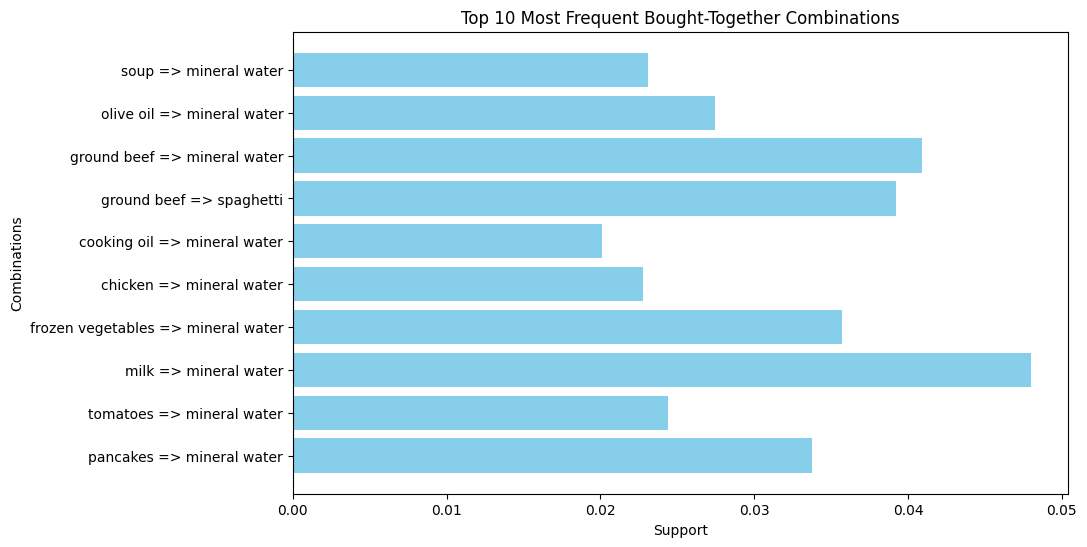

In [ ]:
# Extract antecedents and consequents
antecedents = top10['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top10['consequents'].apply(lambda x: ', '.join(list(x)))

# Combine antecedents and consequents for the bar labels
bar_labels = antecedents + ' => ' + consequents

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(bar_labels, top10['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Combinations')
plt.title('Top 10 Most Frequent Bought-Together Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest support at the top
plt.show()


 An association rule is a rule that predicts the occurrence of an item (consequent) based on the occurrence of other items (antecedents) in a transaction.